In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read sheets 2 and 3 of the Excel file into separate DataFrames
df1 = pd.read_excel('edited.xlsx', sheet_name=0)
df2 = pd.read_excel('edited.xlsx', sheet_name=1)
df3 = pd.read_excel('edited.xlsx', sheet_name=2)

# Print the first few rows of each DataFrame
print('Sheet 1:')
print(df1.head())
print('Sheet 2:')
print(df2.head())
print('Sheet 3:')
print(df3.head())


Sheet 1:
             Scored by      Neha      Amit    Sachin
0         Contribution  8.000000  8.000000  8.000000
1           Initiative  9.000000  8.000000  8.000000
2  Bottleneck analysis  9.000000  7.000000  7.000000
3              Average  8.666667  7.666667  7.666667
4         Contribution  9.000000  8.000000  7.000000
Sheet 2:
                                       Parameters  Neha  Amit  Sachin  week
0                   How happy you felt this week?     6     8       7     1
1  Are you happy with your performance this week?     7    10       7     1
2               Were you satisfied with yourself?     6     9       7     1
3                 How much you enjoyed your work?     7     9      10     1
4      Were you able to get help that you wanted?     9     9      10     1
Sheet 3:
     WEEK                                         Parameters Unnamed: 2 Neha  \
0  WEEK 1  Q1 How would you grade yourself in terms of th...        NaN   10   
1     NaN  Q1 On a scale of 1-10, how m

In [3]:
df1

,Scored by,Neha,Amit,Sachin
0,Contribution,8.000000,8.000000,8.000000
1,Initiative,9.000000,8.000000,8.000000
2,Bottleneck analysis,9.000000,7.000000,7.000000
3,Average,8.666667,7.666667,7.666667
4,Contribution,9.000000,8.000000,7.000000
5,Initiative,9.000000,8.000000,7.000000
6,Bottleneck analysis,5.000000,6.000000,6.000000
7,Average,7.666667,7.333333,6.666667
8,Contribution,9.000000,8.000000,8.000000
9,Initiative,8.000000,7.000000,7.000000


In [4]:
df1['Week'] = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
dfg = df1.groupby('Week', dropna=False).mean()
df1

C:\Users\lolik\AppData\Local\Temp\ipykernel_2220\1200717921.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfg = df1.groupby('Week', dropna=False).mean()


,Scored by,Neha,Amit,Sachin,Week
0,Contribution,8.000000,8.000000,8.000000,1
1,Initiative,9.000000,8.000000,8.000000,1
2,Bottleneck analysis,9.000000,7.000000,7.000000,1
3,Average,8.666667,7.666667,7.666667,1
4,Contribution,9.000000,8.000000,7.000000,2
5,Initiative,9.000000,8.000000,7.000000,2
6,Bottleneck analysis,5.000000,6.000000,6.000000,2
7,Average,7.666667,7.333333,6.666667,2
8,Contribution,9.000000,8.000000,8.000000,3
9,Initiative,8.000000,7.000000,7.000000,3


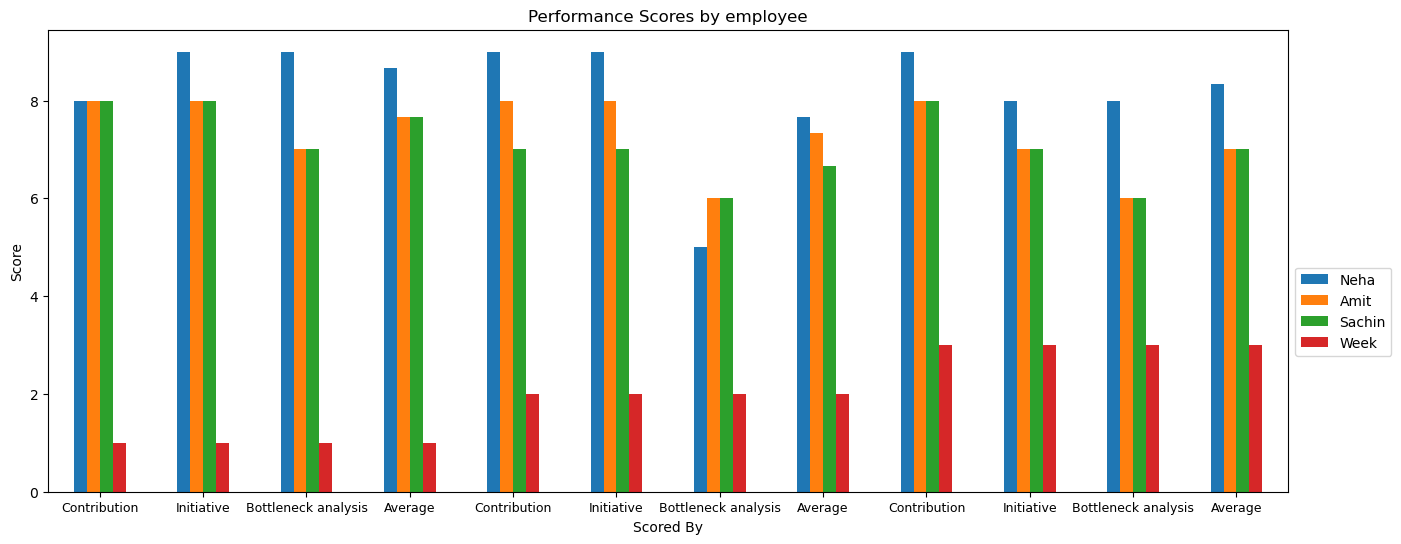

In [17]:
# Create a bar chart of the scores for each person by week
df1.plot(kind='bar',x='Scored by',figsize=(16, 6))
plt.title('Performance Scores by employee')
plt.ylabel('Score')
plt.xlabel('Scored By')
plt.xticks(fontsize=9)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.0, 0.5))

plt.savefig('Performance Scores by employee.jpg')
plt.show()

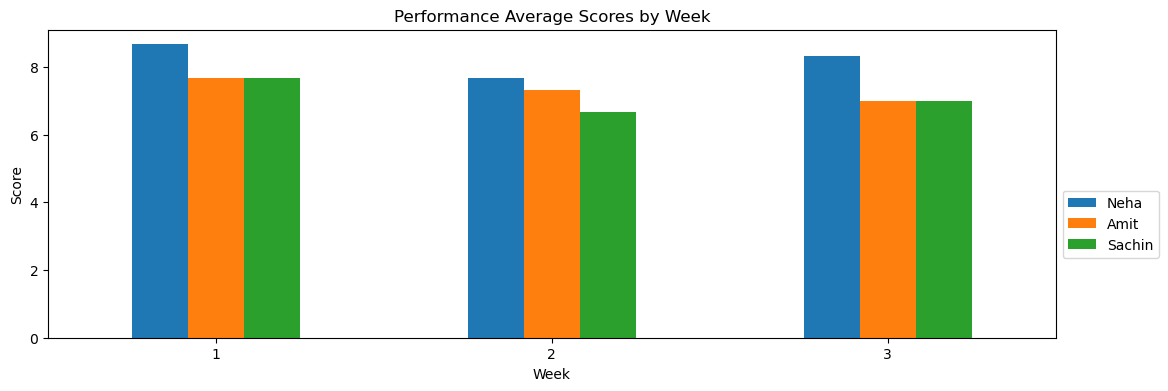

In [20]:
df_selected = dfg[['Neha', 'Amit', 'Sachin']]
df_selected.plot(kind='bar', figsize=(13, 4))
plt.title('Performance Average Scores by Week')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.0, 0.5))

plt.savefig('Performance Average Scores by Week.jpg')
plt.show()

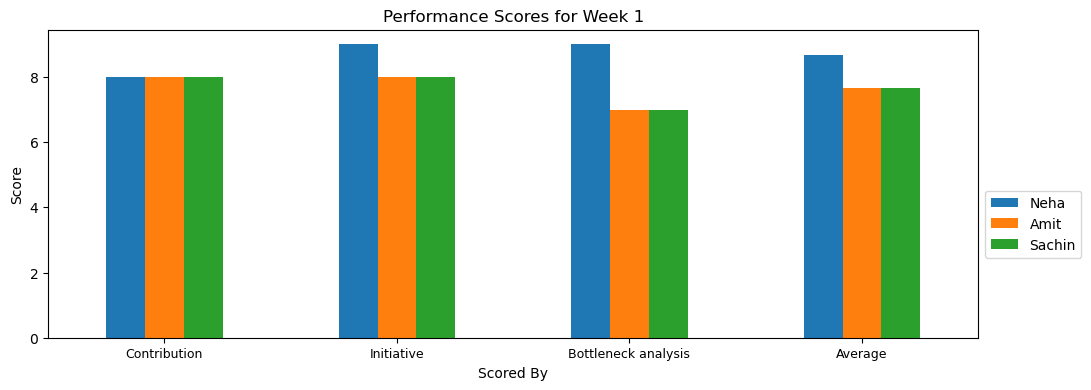

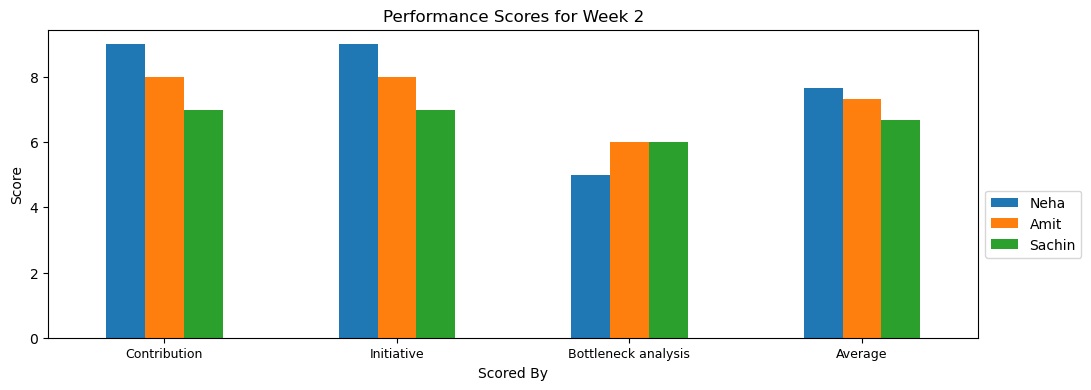

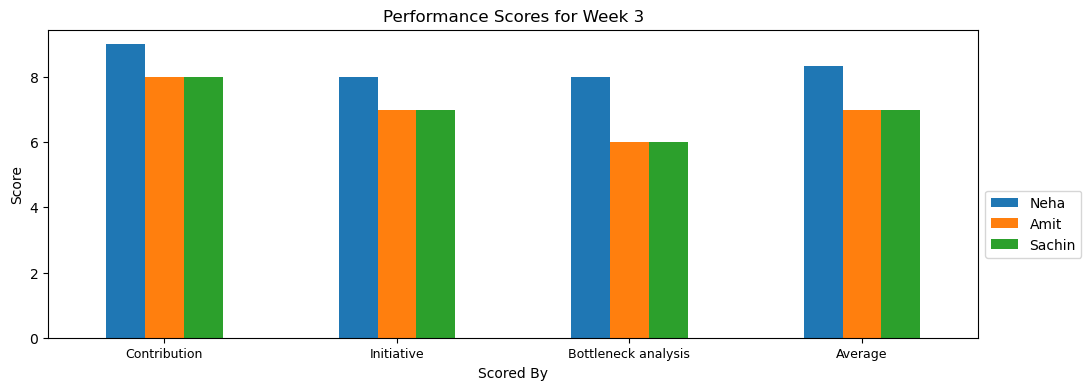

In [9]:
# Group the data by Week
groups = df1.groupby('Week')

# Create a bar chart for each group
for week, data in groups:
    # Drop the 'Week' column from the data
    data = data.drop('Week', axis=1)
    
    data.plot(kind='bar', x='Scored by', figsize=(12, 4))
    plt.title(f'Performance Scores for Week {week}')
    plt.ylabel('Score')
    plt.xlabel('Scored By')
    plt.xticks(fontsize=9)
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1.0, 0.5))
    
    # Save figure with a unique file name for each week
    plt.savefig(f'Performance Scores for Week {week}.jpg')
    
    # Show the figure
    plt.show()


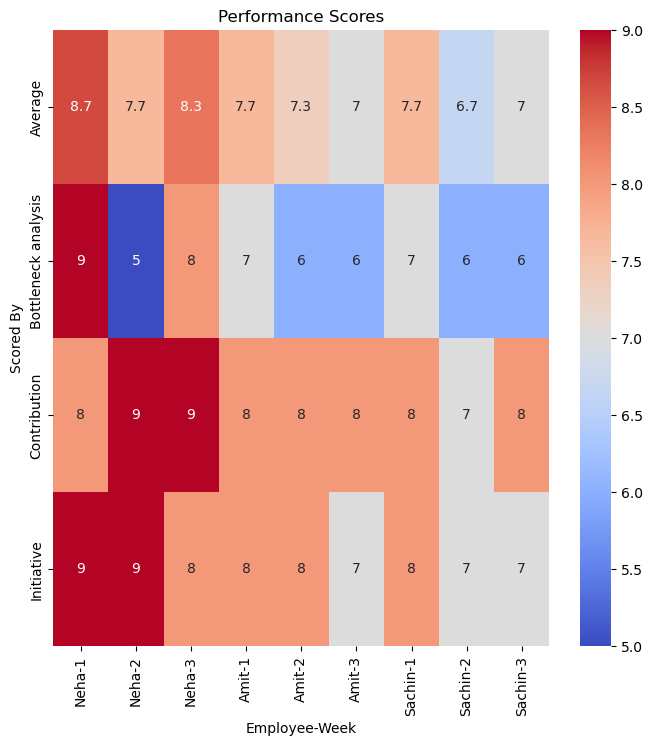

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the table to get 'Scored by' as index and 'Week' as columns
df_pivot = df1.pivot(index='Scored by', columns='Week')

# Create heatmap using seaborn
plt.figure(figsize=(8,8))
sns.heatmap(df_pivot, cmap='coolwarm',annot=True)

# Add title and axis labels
plt.title('Performance Scores')
plt.xlabel('Employee-Week')
plt.ylabel('Scored By')

plt.savefig('Performance Heatmap Scores.jpg')
# Show plot
plt.show()
